In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
symptoms_df=pd.read_csv("Sympthoms.csv")
symptoms_df.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
print("Shape of the dataset:", symptoms_df.shape)



Shape of the dataset: (4920, 133)


In [4]:
print("\nMissing values in each column:")
print(symptoms_df.isnull().sum())


print("\nDescriptive statistics of the dataset:")
print(symptoms_df.describe())


Missing values in each column:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

Descriptive statistics of the dataset:
           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.00

In [6]:
X = symptoms_df.drop('prognosis', axis=1)
y = symptoms_df['prognosis']


le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

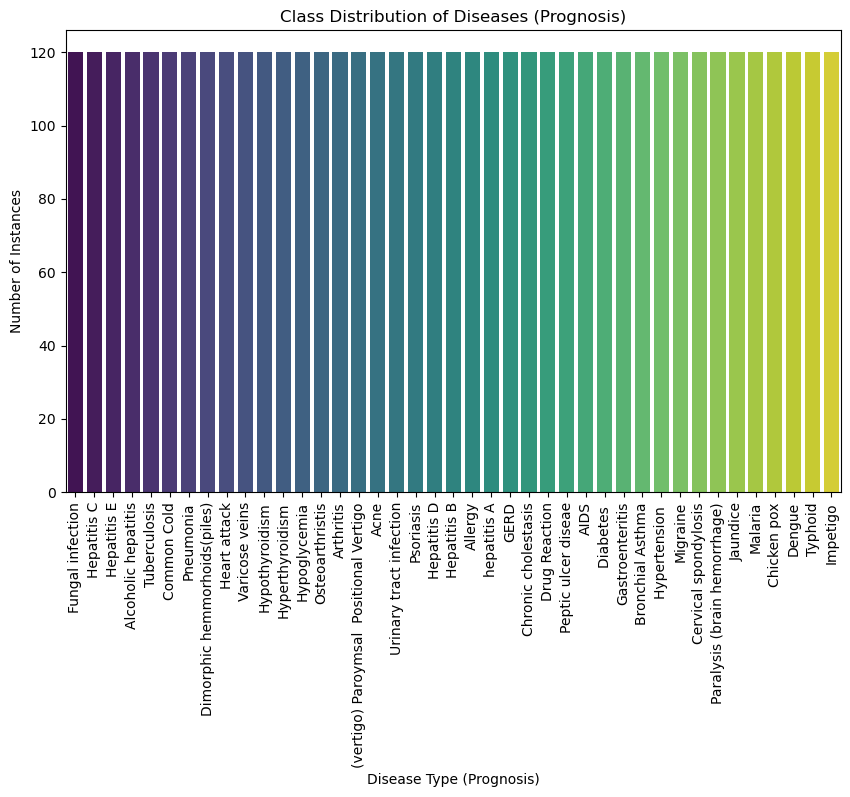

In [7]:
class_distribution = y.value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Distribution of Diseases (Prognosis)")
plt.xticks(rotation=90)
plt.ylabel('Number of Instances')
plt.xlabel('Disease Type (Prognosis)')
plt.show()



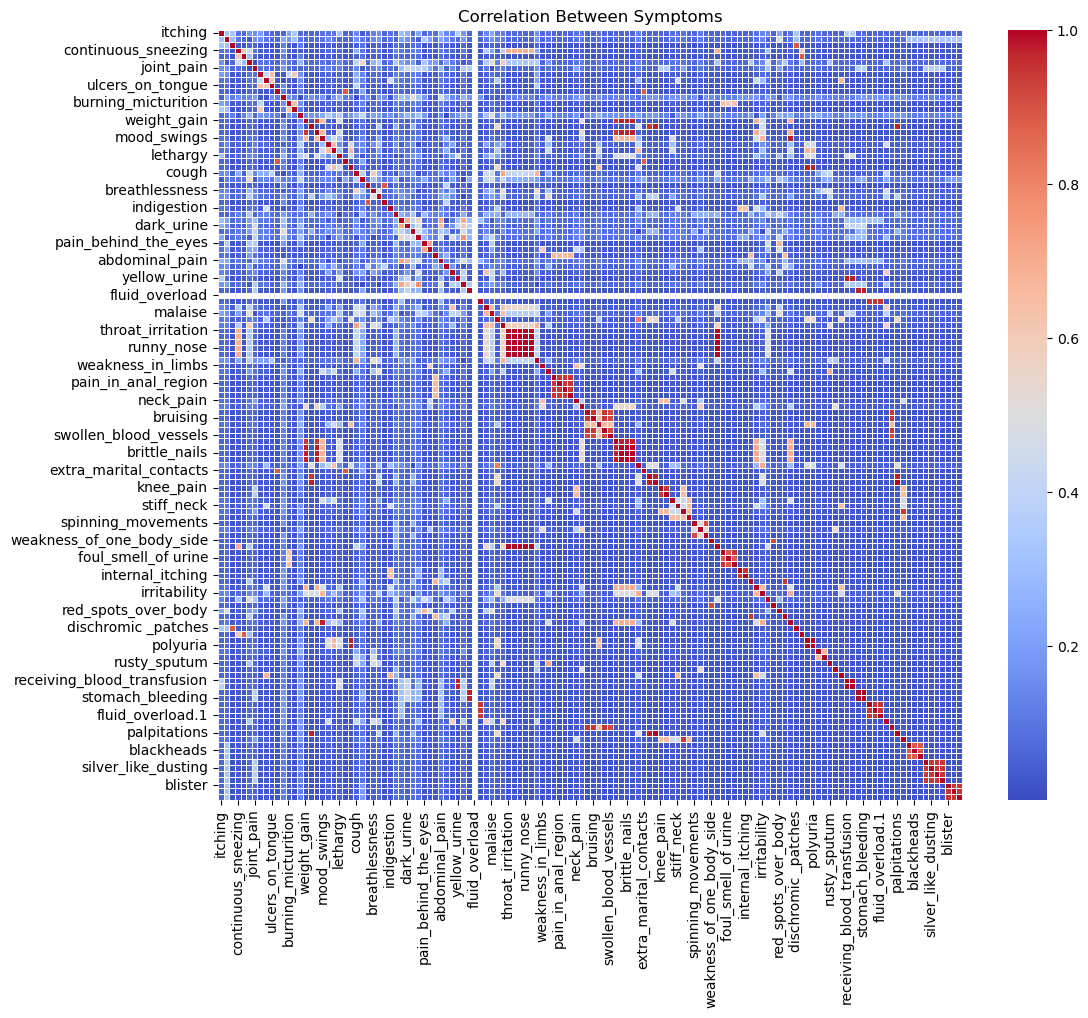

In [8]:
plt.figure(figsize=(12, 10))
corr_matrix = X.corr().abs() 
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Symptoms")
plt.show()



In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize



rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)


voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model), 
        ('gb', gb_model),
        ('lr', lr_model)
    ],
    voting='soft' 
)




In [10]:

voting_clf.fit(X_train, y_train)

with open('voting_classifier.pkl', 'wb') as model_file:
    pickle.dump(voting_clf, model_file)


with open('voting_classifier.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy of the ensemble model:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy of the ensemble model: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        49
          10       1.00      1.00      1.00        37
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        41
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        29
          15       1.00      1.00      1.00        30
          16       1